In [112]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [113]:
#CLEAN DATA
whale_returns = Path("whale_returns.csv")
appl_historical=Path('appl_historical.csv')
algo_returns= Path('algo_returns.csv')
cost_historial=Path('cost_historical.csv')
goog_historical= Path('goog_historical.csv')
sp500_history= Path('sp500_history.csv')



In [114]:
whale_returns_df = pd.read_csv(whale_returns,index_col='Date', infer_datetime_format=True,parse_dates=True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [115]:
#count nulls

whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [116]:
#drop nulls

whale_returns_df= whale_returns_df.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [117]:
# algo returns

algo_returns_df= pd.read_csv(algo_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [118]:
#count nas

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [119]:
algo_returns_df= algo_returns_df.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [120]:
sp500_history_df =pd.read_csv(sp500_history,index_col='Date', infer_datetime_format=True, parse_dates=True,)
sp500_history_df.sort_index(inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [121]:
sp500_history_df.dtypes

Close    object
dtype: object

In [122]:
sp500_history_df['Close']=sp500_history_df['Close'].str.replace('$','')
sp500_history_df['Close']


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [123]:
sp500_history_df.dtypes

Close    object
dtype: object

In [124]:
#change object to float
sp500_history_df['Close']=sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [125]:
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [126]:
sp_500_daily_returns= sp500_history_df.pct_change()
sp_500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [127]:
#drop nulls
sp_500_daily_returns=sp_500_daily_returns.dropna()
sp_500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [128]:
sp_500_daily_returns=sp_500_daily_returns.rename(columns={'Close':'S&P 500'})
sp_500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [129]:
#concatenate into a single data frame.

combined_daily_returns_df= pd.concat([whale_returns_df, algo_returns_df,sp_500_daily_returns], axis= 'columns', join= 'inner')
combined_daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [130]:
#PORTFOLIO ANALYSIS


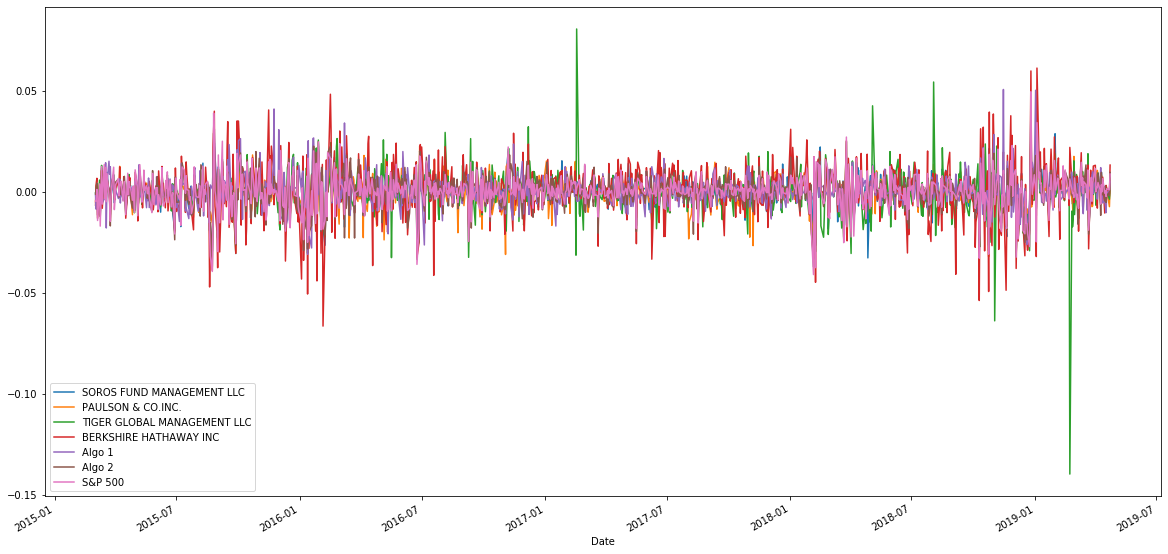

In [131]:
# plot daily returns
  
combined_daily_returns_df.plot(figsize=(20,10))


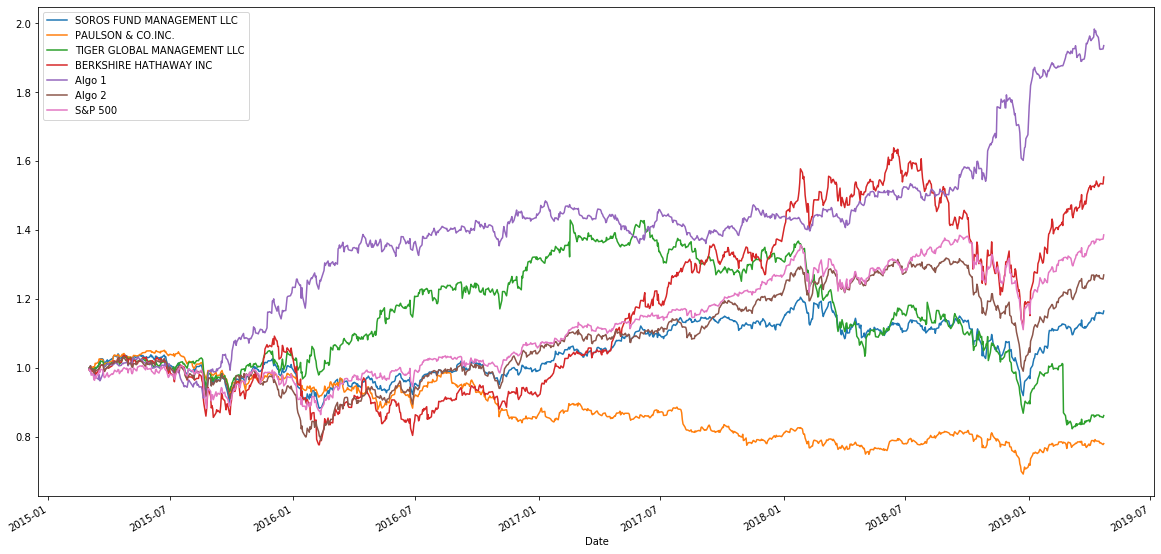

In [132]:
#CALCULATE CUMULATIVE RETURNS
cumulative_returns_df = (1 + combined_daily_returns_df).cumprod()
 
cumulative_returns_df.plot(figsize=(20,10))

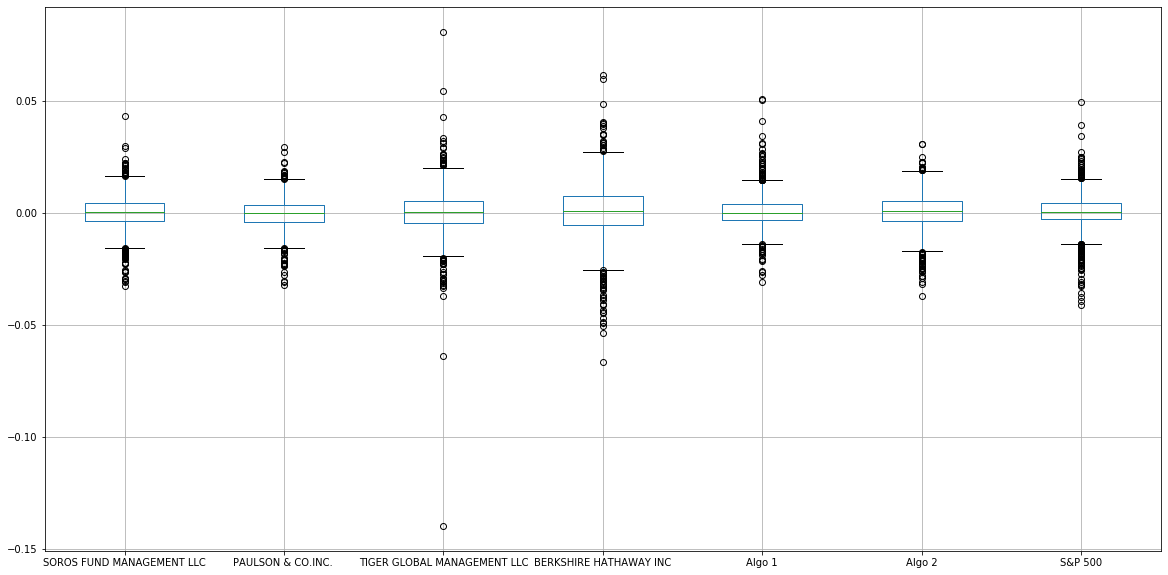

In [133]:
combined_daily_returns_df.boxplot(figsize=(20,10))

In [134]:
# RISK
#create box plot of each portfolio
daily_std= combined_daily_returns_df.std()
daily_std
#column=['Soros Fund Management LLC', 'Paulson & CO INC', 'TIGER GLOBAL MANAGMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2,','S&P 500'

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [135]:
#determine which portfolios are riskier than the S&P 500********




In [136]:
#calculate annual standard deviation

annual_std= daily_std*np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

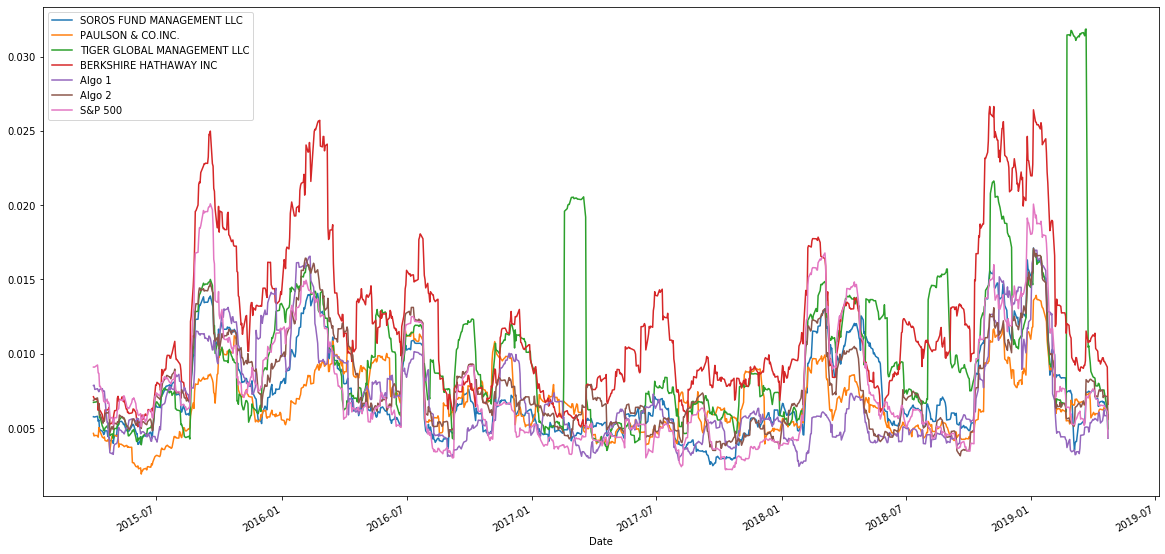

In [156]:
#Plot and calculate the rolling standard deviation

sma_21_= combined_daily_returns_df.rolling(window=21).std().plot(figsize=(20,10))

In [220]:
correlation= combined_daily_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


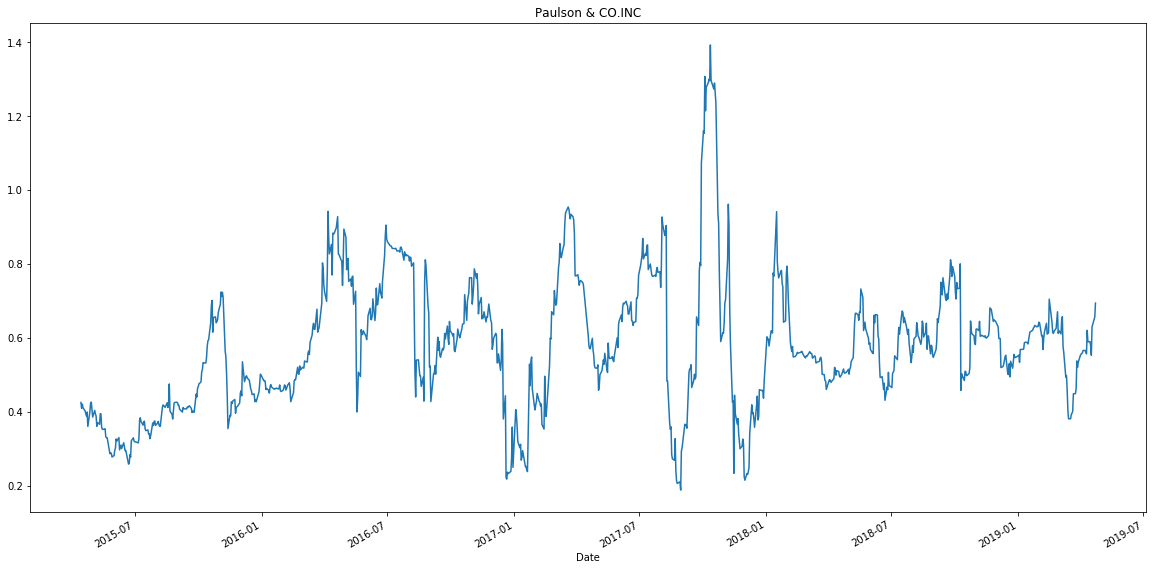

In [256]:
#calculate the beta for a portfolio
#df.drop(df.columns[[2,3,5]], axis = 1)

Paulson_returns =whale_returns_df.drop(columns=['SOROS FUND MANAGEMENT LLC','TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'])

combined_df= pd.concat([Paulson_returns,sp_500_daily_returns], axis='columns', join='inner')

combined_df.sort_index(inplace=True)

combined_df.columns=['Paulson', 'S&P 500']

#
covarience= combined_df['Paulson'].cov(combined_df['S&P 500'])

varience_p= combined_df['Paulson'].var()

Paulson_beta= covarience/varience_p

rolling_covarience= combined_df['Paulson'].rolling(window=30).cov(combined_df['S&P 500'])

rolling_varience= combined_df['S&P 500'].rolling(window=30).var()

rolling_beta= rolling_covarience/rolling_varience

rolling_beta= rolling_beta.dropna()

rolling_beta.plot(title= 'Paulson & CO.INC',figsize=(20,10) )


















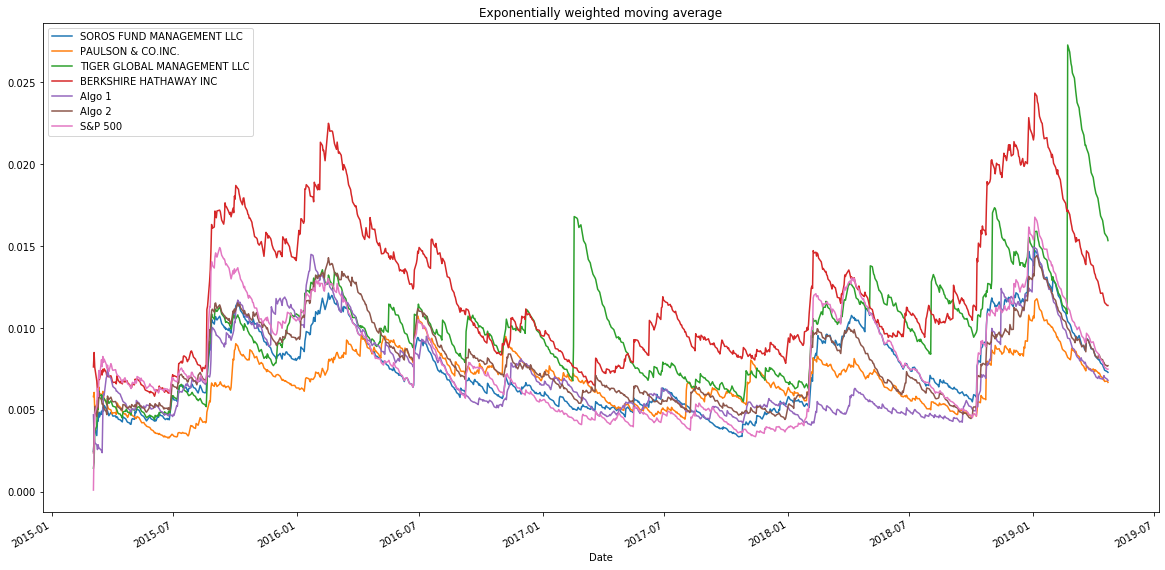

In [277]:
# calculate the exponentially weighted moving average

EWMA= combined_daily_returns_df.ewm(halflife=21,adjust=False).std().plot(title= 'Exponentially weighted moving average',figsize=(20,10))

In [ ]:
appl_historical_df = pd.read_csv(appl_historical,index_col='Trade DATE', infer_datetime_format=True,parse_dates=True)
cost_historical=pd.read_csv(cost_historical, index_col='Trade Date', infer_datetime_format= True, parse_dates=True)
goog_historical= pd.read_csv(goog_historical, index_col='Date', infer_datetime_format= True, parse_dates=True)